# Mine Explosion Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("seismic-bumps.csv")

In [3]:
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,class
0,a,a,N,15180,48,-72,-72,a,0,0,0,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-70,-79,a,1,0,1,0,0,0,0,0,2000,2000,0
2,a,a,N,8050,30,-81,-78,a,0,0,0,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,-23,40,a,1,0,1,0,0,0,0,0,3000,3000,0
4,a,a,N,12640,57,-63,-52,a,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,432,151,b,0,0,0,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,213,118,a,0,0,0,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,101,112,a,0,0,0,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,2,a,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum()

seismic           0
seismoacoustic    0
shift             0
genergy           0
gpuls             0
gdenergy          0
gdpuls            0
ghazard           0
nbumps            0
nbumps2           0
nbumps3           0
nbumps4           0
nbumps5           0
nbumps6           0
nbumps7           0
nbumps89          0
energy            0
maxenergy         0
class             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2584 entries, 0 to 2583
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   seismic         2584 non-null   object
 1   seismoacoustic  2584 non-null   object
 2   shift           2584 non-null   object
 3   genergy         2584 non-null   int64 
 4   gpuls           2584 non-null   int64 
 5   gdenergy        2584 non-null   int64 
 6   gdpuls          2584 non-null   int64 
 7   ghazard         2584 non-null   object
 8   nbumps          2584 non-null   int64 
 9   nbumps2         2584 non-null   int64 
 10  nbumps3         2584 non-null   int64 
 11  nbumps4         2584 non-null   int64 
 12  nbumps5         2584 non-null   int64 
 13  nbumps6         2584 non-null   int64 
 14  nbumps7         2584 non-null   int64 
 15  nbumps89        2584 non-null   int64 
 16  energy          2584 non-null   int64 
 17  maxenergy       2584 non-null   int64 
 18  class   

In [6]:
df['class'].value_counts()

0    2414
1     170
Name: class, dtype: int64

In [7]:
df['seismic'].value_counts()

a    1682
b     902
Name: seismic, dtype: int64

In [8]:
df['seismoacoustic'].value_counts()

a    1580
b     956
c      48
Name: seismoacoustic, dtype: int64

In [9]:
df["ghazard"].value_counts()

a    2342
b     212
c      30
Name: ghazard, dtype: int64

In [10]:
df["shift"].value_counts()

W    1663
N     921
Name: shift, dtype: int64

In [11]:
df.drop(columns=["nbumps6","nbumps7","nbumps89","gdenergy"],axis=1,inplace=True)

In [12]:
df[df["nbumps4"]==1]["class"].value_counts()

0    123
1     20
Name: class, dtype: int64

In [13]:
df[df["nbumps3"]==1]["class"].value_counts()

0    442
1     55
Name: class, dtype: int64

In [14]:
df.pivot_table(columns="class",aggfunc="mean")

class,0,1
energy,4658.222867,9477.352941
gdpuls,4.143745,9.694118
genergy,82448.918807,200911.705882
gpuls,508.567109,964.752941
maxenergy,4072.162386,7213.823529
nbumps,0.769677,2.135294
nbumps2,0.351698,0.988235
nbumps3,0.350870,0.988235
nbumps4,0.062138,0.147059
nbumps5,0.004557,0.005882


In [15]:
df.describe(df.pivot_table(columns="class"))

,genergy,gpuls,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
count,2.584000e+03,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000,2584.000000
mean,9.024252e+04,538.579334,4.508901,0.859520,0.393576,0.392802,0.067724,0.004644,4975.270898,4278.850619,0.065789
std,2.292005e+05,562.652536,63.166556,1.364616,0.783772,0.769710,0.279059,0.068001,20450.833222,19357.454882,0.247962
min,1.000000e+02,2.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0%,1.000000e+02,2.000000,-96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.548500e+04,379.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100%,2.595650e+06,4518.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000,1.000000
max,2.595650e+06,4518.000000,838.000000,9.000000,8.000000,7.000000,3.000000,1.000000,402000.000000,400000.000000,1.000000


In [16]:
df.corr()

,genergy,gpuls,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
genergy,1.000000,0.748020,0.071554,0.220720,0.143587,0.191753,0.150589,-0.009863,0.080828,0.064405,0.128160
gpuls,0.748020,1.000000,0.382906,0.300923,0.207390,0.225695,0.256547,0.049450,0.187350,0.164263,0.201042
gdpuls,0.071554,0.382906,1.000000,0.057996,0.051106,0.014735,0.066195,0.141044,0.143277,0.143646,0.021788
nbumps,0.220720,0.300923,0.057996,1.000000,0.804978,0.803364,0.395052,0.069613,0.347852,0.273714,0.248144
nbumps2,0.143587,0.207390,0.051106,0.804978,1.000000,0.350724,0.161296,-0.005251,0.124650,0.085032,0.201381
nbumps3,0.191753,0.225695,0.014735,0.803364,0.350724,1.000000,0.175301,0.046498,0.244083,0.176480,0.205327
nbumps4,0.150589,0.256547,0.066195,0.395052,0.161296,0.175301,1.000000,-0.016580,0.489828,0.416483,0.075458
nbumps5,-0.009863,0.049450,0.141044,0.069613,-0.005251,0.046498,-0.016580,1.000000,0.773605,0.808406,0.004834
energy,0.080828,0.187350,0.143277,0.347852,0.124650,0.244083,0.489828,0.773605,1.000000,0.989547,0.058431
maxenergy,0.064405,0.164263,0.143646,0.273714,0.085032,0.176480,0.416483,0.808406,0.989547,1.000000,0.040243


# Exploratory Data Analysis

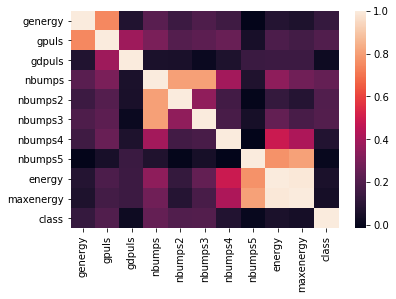

In [17]:
import seaborn as sns
sns.heatmap(df.corr())

Text(0.5, 0, 'genergy')

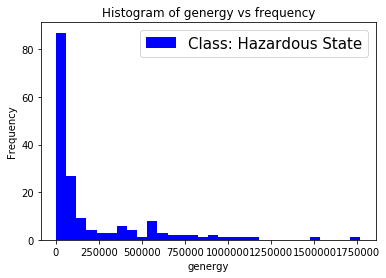

In [18]:
df[df['class']==1]['genergy'].plot.hist(bins=30,color='blue', label='Class: Hazardous State')
plt.legend(fontsize=15)
plt.title ("Histogram of genergy vs frequency")
plt.xlabel("genergy")

Text(0.5, 0, 'genergy')

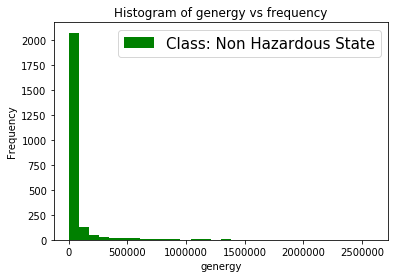

In [19]:
df[df['class']==0]['genergy'].plot.hist(bins=30, color='green', label='Class: Non Hazardous State')
plt.legend(fontsize=15)
plt.title ("Histogram of genergy vs frequency")
plt.xlabel("genergy")

Text(0, 0.5, 'genergy')

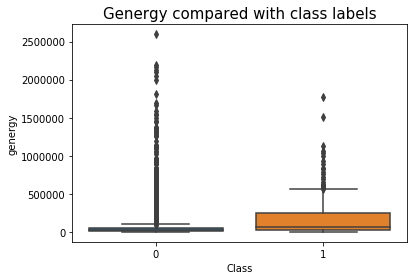

In [20]:
sns.boxplot(x=df['class'],y=df['genergy'])
plt.title("Genergy compared with class labels", fontsize=15)
plt.xlabel("Class")
plt.ylabel("genergy")

Text(0, 0.5, 'nbumps')

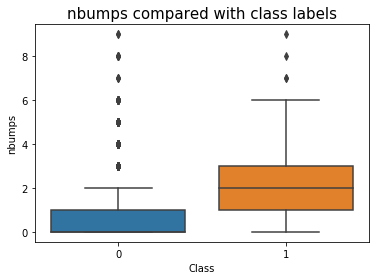

In [21]:
sns.boxplot(x=df['class'],y=df['nbumps'])
plt.title("nbumps compared with class labels", fontsize=15)
plt.xlabel("Class")
plt.ylabel("nbumps")

Text(0.5, 0, 'seismic')

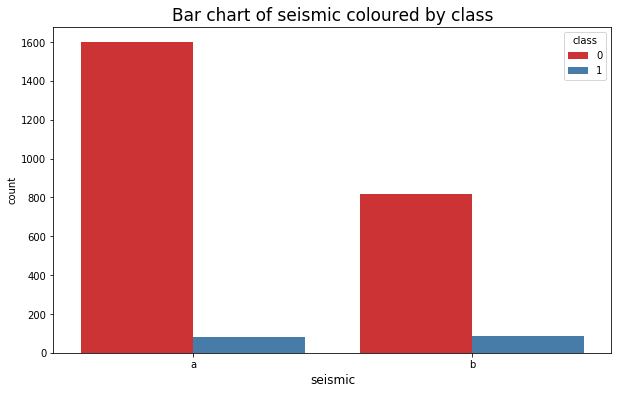

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x='seismic',hue='class',data=df, palette='Set1')
plt.title("Bar chart of seismic coloured by class", fontsize=17)
plt.xlabel("seismic", fontsize=12)

Text(0.5, 0, 'seismoacouistic')

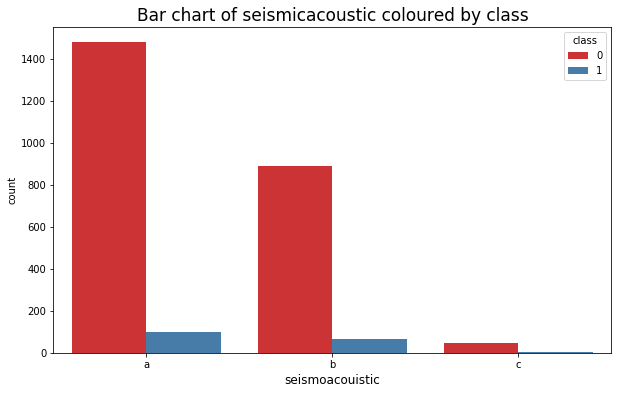

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='seismoacoustic',hue='class',data=df, palette='Set1')
plt.title("Bar chart of seismicacoustic coloured by class", fontsize=17)
plt.xlabel("seismoacouistic", fontsize=12)

Text(0.5, 0, 'ghazard')

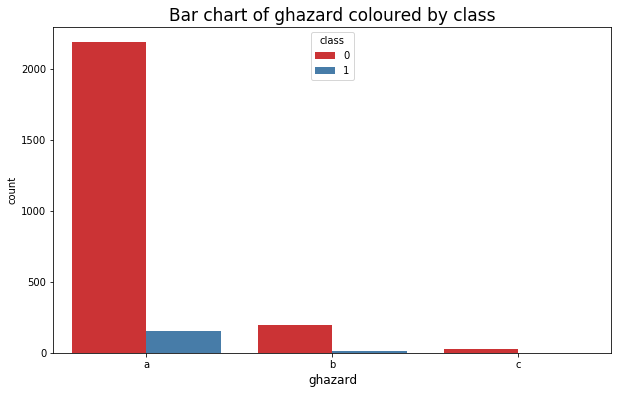

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='ghazard',hue='class',data=df, palette='Set1')
plt.title("Bar chart of ghazard coloured by class", fontsize=17)
plt.xlabel("ghazard", fontsize=12)

# Model Selection

In [25]:
x=df.iloc[:,0:-1]
x

,seismic,seismoacoustic,shift,genergy,gpuls,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy
0,a,a,N,15180,48,-72,a,0,0,0,0,0,0,0
1,a,a,N,14720,33,-79,a,1,0,1,0,0,2000,2000
2,a,a,N,8050,30,-78,a,0,0,0,0,0,0,0
3,a,a,N,28820,171,40,a,1,0,1,0,0,3000,3000
4,a,a,N,12640,57,-52,a,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,151,b,0,0,0,0,0,0,0
2580,b,a,W,42110,555,118,a,0,0,0,0,0,0,0
2581,b,a,W,26960,540,112,a,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,a,0,0,0,0,0,0,0


In [26]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Data Preprocessing

In [27]:
x=pd.get_dummies(x,columns=["ghazard","seismoacoustic"])

In [28]:
x.drop(columns=["ghazard_c","seismoacoustic_c"],axis=1,inplace=True)

In [29]:
df

,seismic,seismoacoustic,shift,genergy,gpuls,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,class
0,a,a,N,15180,48,-72,a,0,0,0,0,0,0,0,0
1,a,a,N,14720,33,-79,a,1,0,1,0,0,2000,2000,0
2,a,a,N,8050,30,-78,a,0,0,0,0,0,0,0,0
3,a,a,N,28820,171,40,a,1,0,1,0,0,3000,3000,0
4,a,a,N,12640,57,-52,a,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,a,W,81410,785,151,b,0,0,0,0,0,0,0,0
2580,b,a,W,42110,555,118,a,0,0,0,0,0,0,0,0
2581,b,a,W,26960,540,112,a,0,0,0,0,0,0,0,0
2582,a,a,W,16130,322,2,a,0,0,0,0,0,0,0,0


In [30]:
x

,seismic,shift,genergy,gpuls,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,maxenergy,ghazard_a,ghazard_b,seismoacoustic_a,seismoacoustic_b
0,a,N,15180,48,-72,0,0,0,0,0,0,0,1,0,1,0
1,a,N,14720,33,-79,1,0,1,0,0,2000,2000,1,0,1,0
2,a,N,8050,30,-78,0,0,0,0,0,0,0,1,0,1,0
3,a,N,28820,171,40,1,0,1,0,0,3000,3000,1,0,1,0
4,a,N,12640,57,-52,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,b,W,81410,785,151,0,0,0,0,0,0,0,0,1,1,0
2580,b,W,42110,555,118,0,0,0,0,0,0,0,1,0,1,0
2581,b,W,26960,540,112,0,0,0,0,0,0,0,1,0,1,0
2582,a,W,16130,322,2,0,0,0,0,0,0,0,1,0,1,0


In [31]:
x["seismoacoustic_a"].value_counts()

1    1580
0    1004
Name: seismoacoustic_a, dtype: int64

In [32]:
x["seismoacoustic_b"].value_counts()

0    1628
1     956
Name: seismoacoustic_b, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x=x.values
x[:,1]=lb.fit_transform(x[:,1])
x[:,0]=lb.fit_transform(x[:,0])

In [34]:
x[0]

array([0, 0, 15180, 48, -72, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=object)

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [37]:
x_test.shape

(776, 16)

In [38]:
x_train.shape

(1808, 16)

# Logistic Regression 

In [54]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_predlr=model.predict(x_test)

In [55]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
acc_lr=accuracy_score(y_test,y_predlr) * 100
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_predlr) * 100))
print("Recall score : %f" %(recall_score(y_test, y_predlr) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_predlr) * 100))
print(confusion_matrix(y_test, y_predlr))


Accuracy score: 92.783505
Recall score : 3.636364
ROC score : 51.610137

[[718   3]
 [ 53   2]]


# SVM

In [56]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(x_train,y_train)

In [57]:
y_predsvm=svc_classifier.predict(x_test)

In [58]:
acc_svm=accuracy_score(y_test,y_predsvm) * 100
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_predsvm) * 100))
print("Recall score : %f" %(recall_score(y_test, y_predsvm) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_predsvm) * 100))
print(confusion_matrix(y_test, y_predsvm))


Accuracy score: 92.912371
Recall score : 0.000000
ROC score : 50.000000

[[721   0]
 [ 55   0]]


# Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=2, random_state=0)
rmf_clf = rmf.fit(x_train, y_train)

In [60]:
y_predrmf=rmf.predict(x_test)

In [61]:
acc_rmf=accuracy_score(y_test,y_predrmf) * 100
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_predrmf) * 100))
print("Recall score : %f" %(recall_score(y_test, y_predrmf) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_predrmf) * 100))
print(confusion_matrix(y_test, y_predrmf))


Accuracy score: 92.912371
Recall score : 0.000000
ROC score : 50.000000

[[721   0]
 [ 55   0]]


In [62]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, Y_train, scores, label=None):
    # calculate the ROC score
    fpr, tpr, thresholds = roc_curve(Y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(Y_train, scores)))
    
    # plot the ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Logistic Regression): 0.52 


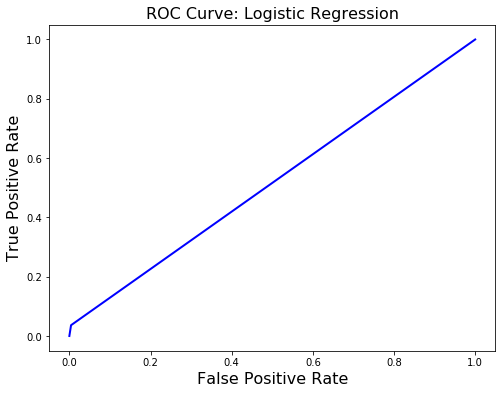

AUC Score (Support Vector Classification): 0.50 


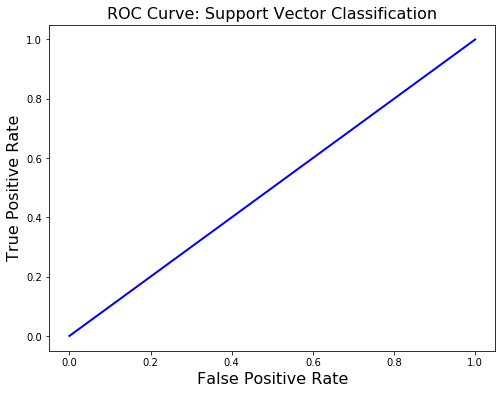

AUC Score (Random Forest Classifier): 0.50 


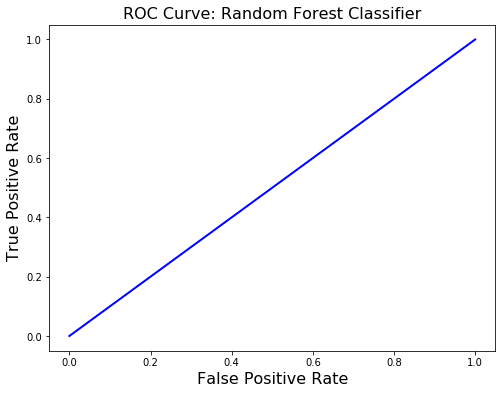

In [63]:
ROC_curve('Logistic Regression', y_test, y_predlr)
ROC_curve('Support Vector Classification',y_test,y_predsvm)
ROC_curve('Random Forest Classifier',y_test,y_predrmf)

In [65]:
import pickle
pickle.dump(model,open("modelmep.pkl","wb"))